## HR DATASET- MARKETING DOMAIN

## METADETA
### satisfaction_level : It is a range of continuous values between 0 and 1 measuring the satisfaction level of an employee.
### last_evaluation	: scores from recent evaluation
### number_project : number of projects done by the employees.	
### average_montly_hours : average time spent on the projects by each employee
### time_spend_company : total number of years spent in the company by each employee
### work_accident : Takes categorical values 0 and 1 to check if the employees had any work accidents or not.
### left : 	Takes categorical values yes and no to check if the employees left the company..
### promotion_last_5years : Takes categorical values 0 and 1 to check if the employees were given a promotion or not.
### is_smoker : Takes categorical values yes and no to check if the employee is a smoker or not..
### department : 10 departments	
### salary : 3 categories for the salary - low,medium,high.


## OBJECTIVE: The model will predict whether the employees left based on the given features.

In [7]:
#importing packages
import time
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [8]:
#reading the dataset
df=pd.read_csv("hr_data.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low
5,0.41,0.50,2,NaN,NaN,0,yes,0,NaN,sales,low
6,0.10,0.77,6,247.0,4.0,0,yes,0,NaN,sales,low
7,0.92,0.85,5,259.0,5.0,0,yes,0,NaN,sales,low
8,0.89,1.00,5,224.0,5.0,0,yes,0,NaN,sales,low
9,0.42,0.53,2,142.0,3.0,0,yes,0,NaN,sales,low


In [9]:
#A statistical outlook of the dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14631.000000,14848.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,200.958376,3.494141,0.144610,0.021268
std,0.248631,0.171169,1.232592,50.002307,1.458976,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [10]:
#including categorical features as well.
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
count,14999.000000,14999.000000,14999.000000,14631.000000,14848.000000,14999.000000,14999,14999.000000,235,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,no,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,11428,NaN,180,4140,7316
mean,0.612834,0.716102,3.803054,200.958376,3.494141,0.144610,NaN,0.021268,NaN,NaN,NaN
std,0.248631,0.171169,1.232592,50.002307,1.458976,0.351719,NaN,0.144281,NaN,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,NaN,0.000000,NaN,NaN,NaN


In [11]:
# CHECKING FOR UNIQUE VALUES OF THE FEATURES

In [12]:
df['work_accident'].unique()

array([0, 1], dtype=int64)

In [13]:
df['left'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [15]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [17]:
print("salary: ",df['salary'].nunique())
print("department: ",df['department'].nunique())
print("is_smoker: ",df['is_smoker'].nunique())
print('number_project: ',df['number_project'].nunique())
print("left:",df['left'].nunique())
print("work_accident:",df['work_accident'].nunique())

salary:  3
department:  10
is_smoker:  2
number_project:  6
left: 2
work_accident: 2


In [18]:
#GIVES OVERALL INFO ABOUT NO. OF MISSING VALUES AND DTYPES.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14631 non-null  float64
 4   time_spend_company     14848 non-null  float64
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  int64  
 8   is_smoker              235 non-null    object 
 9   department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB


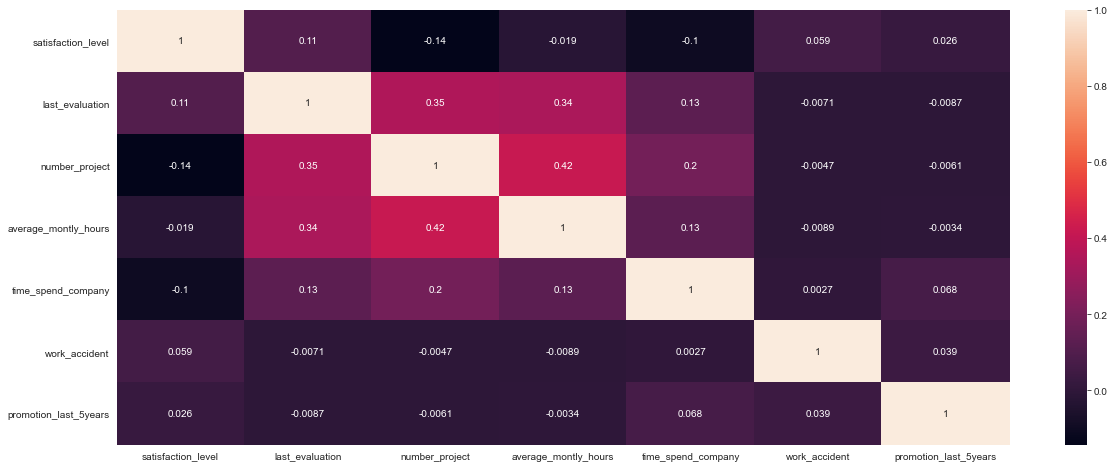

In [19]:
# TO CHECK OVERALL CORRELATION
sns.set_style('whitegrid')
plot.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

### We can see there is a decent correlation between last_evaluation,number_project and average_montly_hour.

### IMPUTATION OF MISSING VALUES

In [20]:
HR=df.copy()
HR.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low
5,0.41,0.50,2,NaN,NaN,0,yes,0,NaN,sales,low
6,0.10,0.77,6,247.0,4.0,0,yes,0,NaN,sales,low
7,0.92,0.85,5,259.0,5.0,0,yes,0,NaN,sales,low
8,0.89,1.00,5,224.0,5.0,0,yes,0,NaN,sales,low
9,0.42,0.53,2,142.0,3.0,0,yes,0,NaN,sales,low


In [21]:
# CHECKING FOR MISSING VALUES & FILLING THEM.

In [22]:
HR['average_montly_hours'].isnull().any()
   

True

In [23]:
HR['time_spend_company'].isnull().any()

True

In [24]:
HR['is_smoker'].isnull().any()

True

In [25]:
# Dropping the rows with null values
HR.dropna(subset=['time_spend_company'],inplace=True)


In [26]:
# filling in the missing rows with mean
HR['average_montly_hours'].fillna(HR['average_montly_hours'].mean(),inplace=True)

In [27]:
# dropped the is_Smoker column
HR.drop(columns='is_smoker',inplace=True)


In [28]:
HR.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,sales,low
6,0.10,0.77,6,247.0,4.0,0,yes,0,sales,low
7,0.92,0.85,5,259.0,5.0,0,yes,0,sales,low
8,0.89,1.00,5,224.0,5.0,0,yes,0,sales,low
9,0.42,0.53,2,142.0,3.0,0,yes,0,sales,low
10,0.45,0.54,2,135.0,3.0,0,yes,0,sales,low
11,0.11,0.81,6,305.0,4.0,0,yes,0,sales,low


In [29]:
# setting index
HR.index=range(1,len(HR)+1)

In [30]:
HR.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1,0.38,0.53,2,157.0,3.0,0,yes,0,sales,low
2,0.80,0.86,5,262.0,6.0,0,yes,0,sales,medium
3,0.11,0.88,7,272.0,4.0,0,yes,0,sales,medium
4,0.72,0.87,5,223.0,5.0,0,yes,0,sales,low
5,0.10,0.77,6,247.0,4.0,0,yes,0,sales,low
6,0.92,0.85,5,259.0,5.0,0,yes,0,sales,low
7,0.89,1.00,5,224.0,5.0,0,yes,0,sales,low
8,0.42,0.53,2,142.0,3.0,0,yes,0,sales,low
9,0.45,0.54,2,135.0,3.0,0,yes,0,sales,low
10,0.11,0.81,6,305.0,4.0,0,yes,0,sales,low


In [31]:
# checking info after missing values filled.
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14848 entries, 1 to 14848
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14848 non-null  float64
 1   last_evaluation        14848 non-null  float64
 2   number_project         14848 non-null  int64  
 3   average_montly_hours   14848 non-null  float64
 4   time_spend_company     14848 non-null  float64
 5   work_accident          14848 non-null  int64  
 6   left                   14848 non-null  object 
 7   promotion_last_5years  14848 non-null  int64  
 8   department             14848 non-null  object 
 9   salary                 14848 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 1.1+ MB


### EXPLORATORY DATA ANALYSIS

In [32]:
# 1. TO CHECK NO. OF PROJECTS OF EACH EMP.
grp=HR['number_project'].value_counts().head(10)
grp

4    4331
3    4028
5    2736
2    2346
6    1156
7     251
Name: number_project, dtype: int64

## Most of the employees work on 4 projects.

In [33]:
# 2. TOP 3 DEPARTMENTS
grp2=df['department'].value_counts().head(10)
grp2

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### TOP 3 DEPARTMENTS
### 1. SALES
### 2.  TECHNICAL
### 3. SUPPORT

In [34]:
# 3. CATEGORY OF SALARY MOST PPREFERED.
grp3=df['salary'].value_counts().head()
grp3

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

## Most of the employees have low salary

In [35]:
# 4. TIME SPENT IN THE COMPANY BY THE EMPLOYEES.
grp6=HR['time_spend_company'].value_counts().head()
grp6

3.0    6383
2.0    3227
4.0    2525
5.0    1450
6.0     707
Name: time_spend_company, dtype: int64

### Most of the employees spent min 3 years and max 6 years in the firm.

### VISUALISATIONS

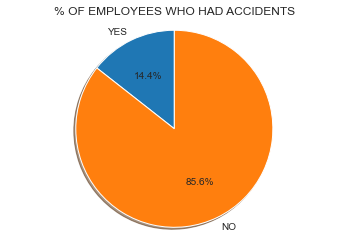

In [36]:
labels = 'YES','NO'
YES=len(HR[HR.work_accident==1])
NO=len(HR[HR.work_accident==0])


sizes = [YES,NO]
explode = (0.0,0.0)  

fig1, ax1 = plot.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plot.title('% OF EMPLOYEES WHO HAD ACCIDENTS')
plot.show()

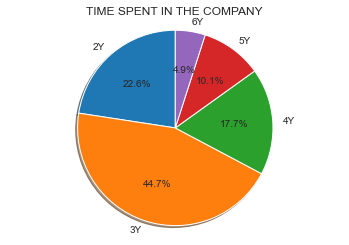

In [37]:
labels = '2Y','3Y','4Y','5Y','6Y'
Y2=len(HR[HR.time_spend_company==2.0])
Y3=len(HR[HR.time_spend_company==3.0])
Y4=len(HR[HR.time_spend_company==4.0])
Y5=len(HR[HR.time_spend_company==5.0])
Y6=len(HR[HR.time_spend_company==6.0])


sizes = [Y2,Y3,Y4,Y5,Y6]
explode = (0.0,0.0,0.0,0.0,0.0)  

fig1, ax1 = plot.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plot.title('TIME SPENT IN THE COMPANY')
plot.show()

In [38]:
# 5. To check number of employees who left from each dept.
dep=HR.copy()
dep=pd.DataFrame(HR.groupby('department')['left'].count())
dep.sort_values('left',ascending=False)

,left
department,
sales,4091
technical,2693
support,2207
IT,1221
product_mng,896
marketing,849
RandD,779
accounting,758
hr,732


## Most of the employees from the sales department have left.

In [39]:
dep.reset_index(inplace=True)
dep.head(10)

,department,left
0,IT,1221
1,RandD,779
2,accounting,758
3,hr,732
4,management,622
5,marketing,849
6,product_mng,896
7,sales,4091
8,support,2207
9,technical,2693


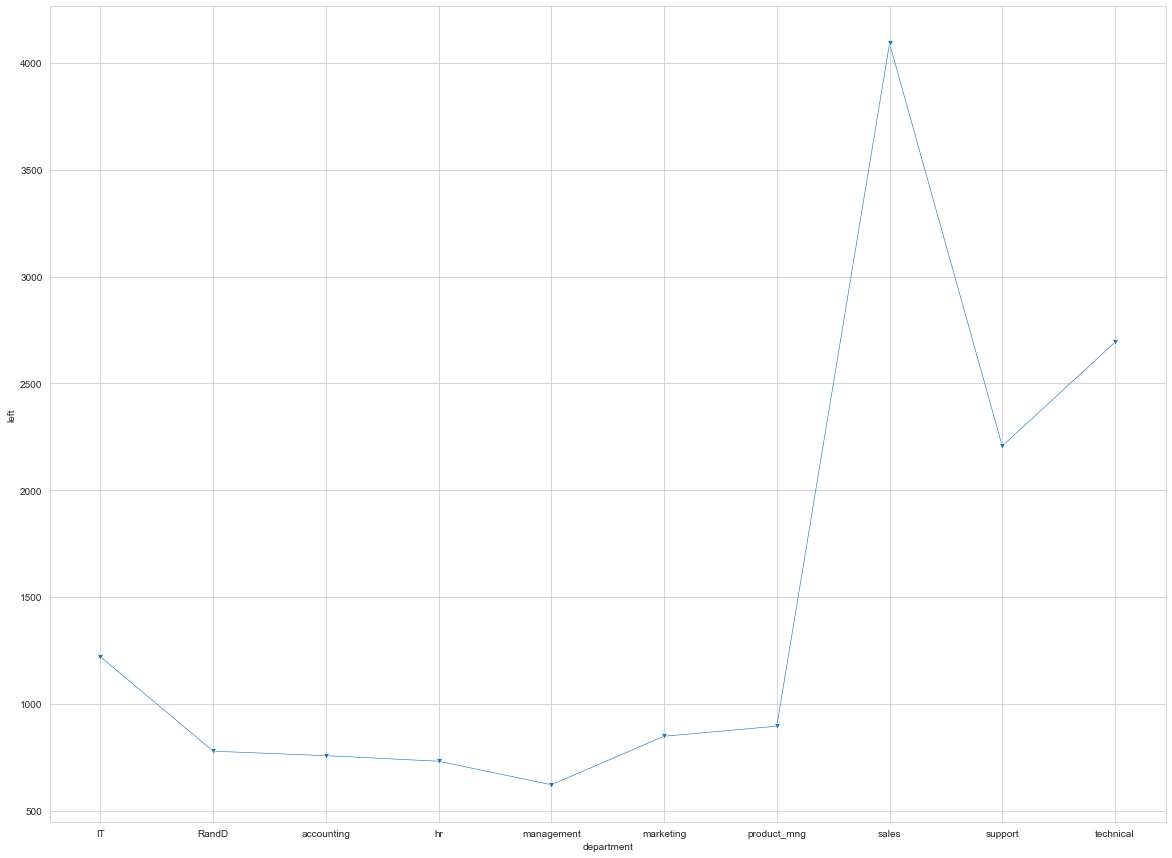

In [40]:
plot.figure(figsize=(20,15))
sns.lineplot(x='department',y='left',data=dep,marker='v',linewidth=0.6)

In [41]:
# 6. To check satisfaction level of employees from each dept.
dep1=HR.copy()
dep1=pd.DataFrame(HR.groupby('department')['satisfaction_level'].mean())
dep1.sort_values('satisfaction_level',ascending=False)

,satisfaction_level
department,
RandD,0.622054
management,0.621495
marketing,0.619494
product_mng,0.619263
support,0.619203
IT,0.618002
sales,0.615629
technical,0.608879
hr,0.597910


In [42]:
dep1.reset_index(inplace=True)
dep1.head(10)

,department,satisfaction_level
0,IT,0.618002
1,RandD,0.622054
2,accounting,0.583061
3,hr,0.597910
4,management,0.621495
5,marketing,0.619494
6,product_mng,0.619263
7,sales,0.615629
8,support,0.619203
9,technical,0.608879


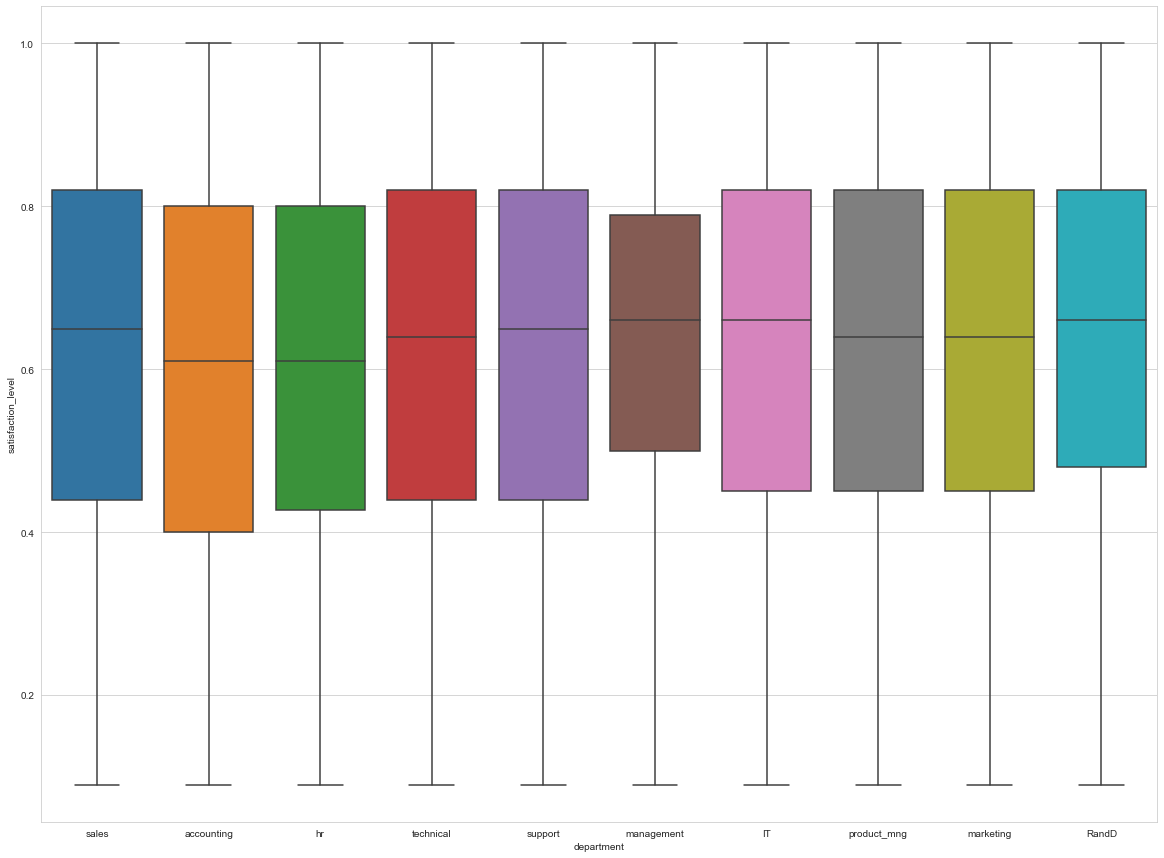

In [43]:
plot.figure(figsize=(20,15))
sns.boxplot(x='department',y='satisfaction_level',data=HR)

## We can see there are no outliers in the boxplots above.

In [44]:
# 7. To check last evaluation level for employees of each dept.
dep1=HR.copy()
dep1=pd.DataFrame(HR.groupby('department')['last_evaluation'].mean())
dep1.sort_values('last_evaluation',ascending=False)

,last_evaluation
department,
management,0.724743
support,0.723244
technical,0.721363
accounting,0.717902
IT,0.716945
marketing,0.715253
product_mng,0.714063
RandD,0.710822
sales,0.710012


## We can see that the Management department is more satisfied after the last evaluation.

In [45]:
# DERIVED NEW ATTRIBUTE
Diff=HR['last_evaluation']-HR['satisfaction_level']
Score=[]
for x in Diff:
    if x<0:
        Score.append(0)
    elif x>0:
        Score.append(1)
    else: Score.append(-1)
HR['is_improved']=Score
HR.head(10)
       

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,is_improved
1,0.38,0.53,2,157.0,3.0,0,yes,0,sales,low,1
2,0.80,0.86,5,262.0,6.0,0,yes,0,sales,medium,1
3,0.11,0.88,7,272.0,4.0,0,yes,0,sales,medium,1
4,0.72,0.87,5,223.0,5.0,0,yes,0,sales,low,1
5,0.10,0.77,6,247.0,4.0,0,yes,0,sales,low,1
6,0.92,0.85,5,259.0,5.0,0,yes,0,sales,low,0
7,0.89,1.00,5,224.0,5.0,0,yes,0,sales,low,1
8,0.42,0.53,2,142.0,3.0,0,yes,0,sales,low,1
9,0.45,0.54,2,135.0,3.0,0,yes,0,sales,low,1
10,0.11,0.81,6,305.0,4.0,0,yes,0,sales,low,1


In [46]:
HR['is_improved'].value_counts()

 1    9484
 0    5132
-1     232
Name: is_improved, dtype: int64

## Since there is a  high positive difference it shows that employees are more satisfied sine the last evaluation.

## LABEL ENCODING

In [47]:
le=LabelEncoder()

In [48]:
le.fit_transform(HR['department'])

array([7, 7, 7, ..., 8, 8, 8])

In [49]:
le.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [50]:
HR['dept_encoded']=le.fit_transform(HR['department'])

In [51]:
le.fit_transform(HR['left'])

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
HR['left_encoded']=le.fit_transform(HR['left'])

In [53]:
HR['salary']=le.fit_transform(HR['salary'])

In [54]:
HR.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,is_improved,dept_encoded,left_encoded
1,0.38,0.53,2,157.0,3.0,0,yes,0,sales,1,1,7,1
2,0.80,0.86,5,262.0,6.0,0,yes,0,sales,2,1,7,1
3,0.11,0.88,7,272.0,4.0,0,yes,0,sales,2,1,7,1
4,0.72,0.87,5,223.0,5.0,0,yes,0,sales,1,1,7,1
5,0.10,0.77,6,247.0,4.0,0,yes,0,sales,1,1,7,1
6,0.92,0.85,5,259.0,5.0,0,yes,0,sales,1,0,7,1
7,0.89,1.00,5,224.0,5.0,0,yes,0,sales,1,1,7,1
8,0.42,0.53,2,142.0,3.0,0,yes,0,sales,1,1,7,1
9,0.45,0.54,2,135.0,3.0,0,yes,0,sales,1,1,7,1
10,0.11,0.81,6,305.0,4.0,0,yes,0,sales,1,1,7,1


## MODELLING

In [55]:
Feature=HR.iloc[:,[0,1,2,3,4,5,7,9,10,11]]

In [56]:
Feature.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary,is_improved,dept_encoded
1,0.38,0.53,2,157.0,3.0,0,0,1,1,7
2,0.80,0.86,5,262.0,6.0,0,0,2,1,7
3,0.11,0.88,7,272.0,4.0,0,0,2,1,7
4,0.72,0.87,5,223.0,5.0,0,0,1,1,7
5,0.10,0.77,6,247.0,4.0,0,0,1,1,7
6,0.92,0.85,5,259.0,5.0,0,0,1,0,7
7,0.89,1.00,5,224.0,5.0,0,0,1,1,7
8,0.42,0.53,2,142.0,3.0,0,0,1,1,7
9,0.45,0.54,2,135.0,3.0,0,0,1,1,7
10,0.11,0.81,6,305.0,4.0,0,0,1,1,7


In [57]:
# left_encoded will be our target variable here
Target=HR.iloc[:,-1]

In [58]:
x_train,x_test,y_train,y_test=split(Feature,Target,test_size=0.4,random_state=12)

## LOGISTIC REGRESSION MODEL

In [59]:
Log=LogisticRegression()

In [60]:
%%time
Log.fit(x_train,y_train)

Wall time: 135 ms


C:\Users\Karunya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
scores=Log.coef_
# plot feature importance
for x,y in enumerate(scores[0]):
    print("Feature ",str(x)," score",str(y))

Feature  0  score -2.4446653701742966
Feature  1  score -1.2116088311753783
Feature  2  score -0.16394033193321533
Feature  3  score 0.0051283668560980255
Feature  4  score 0.22865731456569496
Feature  5  score -1.3379306061700271
Feature  6  score -0.9860796786946462
Feature  7  score 0.02711450517240802
Feature  8  score 1.826227122011842
Feature  9  score 0.03954959878623747


## TOP 3 IMPORTANT FEATURES : 
## 8- DEPARTMENT OF EMPLOYEES
## 4- TIME SPENT IN THE COMPANY BY THE EMPLOYEES.
## 9- SALARY OF THE EMPLOYEES.


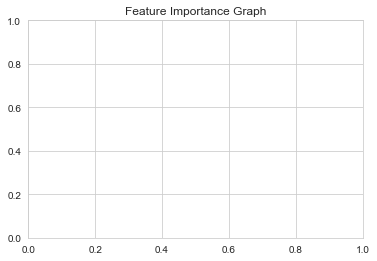

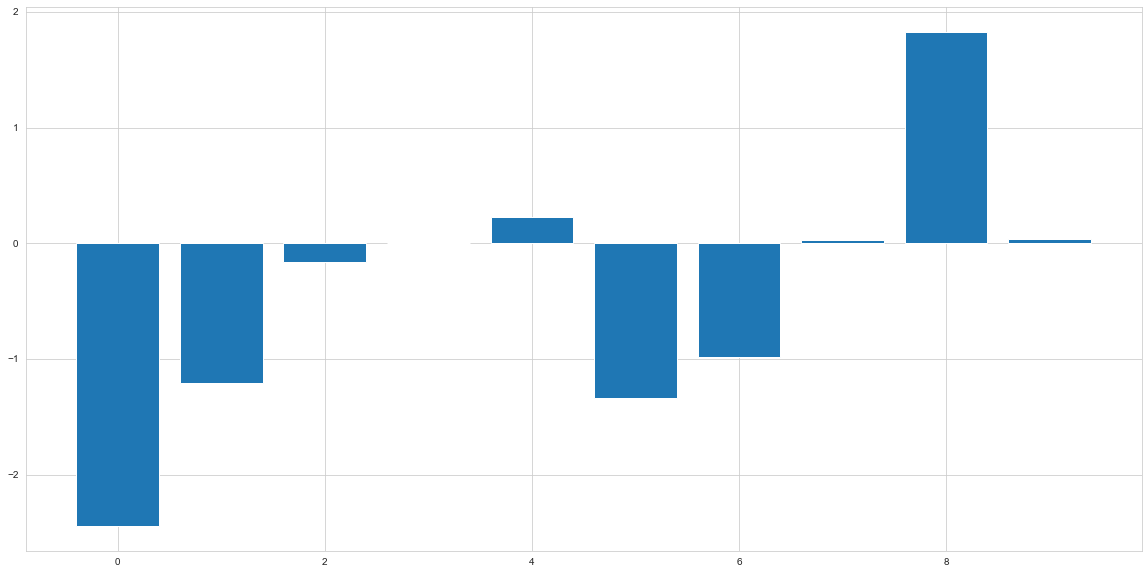

In [62]:
plot.title("Feature Importance Graph")
plot.figure(figsize=(20,10))
plot.bar([x for x in range(len(scores[0]))], scores[0])
plot.show()

In [63]:
%%time
yhat=Log.predict(x_test)
yhat

Wall time: 3 ms


array([0, 0, 0, ..., 0, 0, 0])

In [64]:
from sklearn import metrics

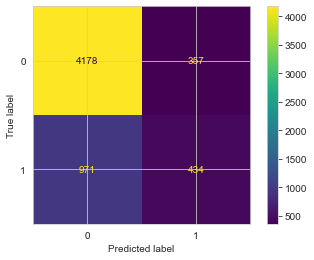

In [65]:
## Confustion matrix
## A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, 
## where N is the number of target classes.The matrix compares the actual target values with those predicted by 
## the machine learning model. This gives us a holistic view of how well our classification model is performing
## and what kinds of errors it is making
matrix1=plot_confusion_matrix(Log,x_test,y_test)
plot.show()

In [66]:
## Here also True Positive(TP) and True Negative(TN) have not given us good results.

In [67]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      5149
           1       0.31      0.55      0.40       791

    accuracy                           0.78      5940
   macro avg       0.62      0.68      0.63      5940
weighted avg       0.84      0.78      0.80      5940



In [68]:
## Precision:  It can be defined as the number of correct outputs provided by the model or out of all positive classes
##that have predicted correctly by the model, how many of them were actually true. 
##formula: TP/TP+FP
precision_positive = metrics.precision_score(y_test, yhat, pos_label=1)
precision_negative = metrics.precision_score(y_test, yhat, pos_label=0)
precision_positive, precision_negative

(0.5486725663716814, 0.8114196931442998)

In [ ]:
## We can see that precision of positive class is less and the precision of negative class is high.

In [69]:
## Recall:Recall can also be defined with respect to either of the classes.The recall must be as high as possible.

In [70]:
## Sensitivity: Recall of positive class is also termed sensitivity and is defined as the ratio of the True Positive
## to the number of actual positive cases. It can intuitively be expressed as the ability of the classifier to 
## capture all the positive cases.It is also called the True Positive Rate (TPR).
## formula: TP/TP+FN


In [71]:
## Specificity: Recall of negative class is also termed specificity and is defined as the ratio of the True Negative
## to the number of actual negative cases. It can intuitively be expressed as the ability of the classifier to capture 
## all the negative cases.It is also called True Negative Rate (TNR).
## formula: TN/TN+FP

In [72]:
recall_sensitivity = metrics.recall_score(y_test, yhat, pos_label=1)
recall_specificity = metrics.recall_score(y_test, yhat, pos_label=0)
recall_sensitivity, recall_specificity 

(0.3088967971530249, 0.9212789415656009)

In [ ]:
## we can see that sensitivity is less but specificity is very high which means recall of negative class is high.

In [73]:
## F1 score: It is the harmonic mean of precision and recall.
## If two models have low precision and high recall or vice versa, it is difficult to compare these models. 
## So, for this purpose, we can use F-score. This score helps us to evaluate the recall and precision at the same time. 
##The F-score is maximum if the recall is equal to the precision.
## formula: 2*Recall + Precision/Recall + Precision
f1_positive = metrics.f1_score(y_test, yhat, pos_label=1)
f1_negative = metrics.f1_score(y_test, yhat, pos_label=0)
f1_positive, f1_negative 

(0.39526411657559196, 0.8628665840561751)

In [74]:
## Since the f1_score is a bit far from 1 we can say that this model is not that good.

In [75]:
## misclassification rate: It is also termed as Error rate, and it defines how often the model gives the wrong predictions. 
## The value of error rate can be calculated as the number of incorrect predictions to all number of the predictions
## made by the classifier. 
## formula : FP+FN/TP+FP+FN+TN

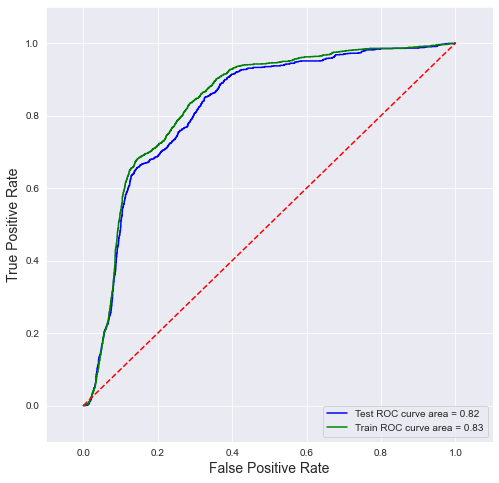

In [81]:
## ROC & AUROC
sns.set_style('darkgrid')
preds_train = Log.predict(x_train)
 # calculate prediction probability
prob_train = np.squeeze(Log.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(Log.predict_proba(x_test)[:,1].reshape(1,-1))
 # false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
 # auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plot.figure(figsize=(8,8))
 # plot auc 
plot.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plot.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plot.plot([0,1],[0,1], 'r--')
plot.xlim([-0.1, 1.1])
plot.ylim([-0.1, 1.1])
plot.xlabel('False Positive Rate', size=14)
plot.ylabel('True Positive Rate', size=14)
plot.legend(loc='lower right')
plot.show() 